## Importing Libraries

In [1]:
import pandas as pd
import requests
from lxml import html
from bs4 import BeautifulSoup
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")
import numpy  as np
import calendar
import re

import matplotlib.pyplot as plt
import seaborn as sb
import calendar

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import re
import random
from sklearn.model_selection import KFold
from sklearn.svm import SVR
 

from sklearn.linear_model import LinearRegression, Lasso, Ridge


## Scrapping Temperature data for Dublin City from Wikipedia

In [2]:
url = "https://en.wikipedia.org/wiki/Dublin"
response = requests.get(url).text
soup = BeautifulSoup(response, 'lxml')
my_table = soup.find('table', {'class':'wikitable mw-collapsible'}) #wikitable mw-collapsible mw-made-collapsible
values = my_table.findAll('td')

In [3]:
climate = []
for value in values:
    climate.append(value.get_text())

## Creating Data Frame from Scrapped Data

In [4]:
count=0
df_temperature = pd.DataFrame()
while count < 12:
    df_temperature = df_temperature.append({'average_high_celsius' : climate[count], 'daily_mean_celsius' : climate[count+13], 'average_low_celsius' : climate[count+26], 'average_precipitation_mm' : climate[count+39], 'average_precipitation_days' : climate[count+52], 'average_relative_hummidity' : climate[count+65]} ,ignore_index=True)
    count += 1

In [5]:
df_temperature

,average_high_celsius,average_low_celsius,average_precipitation_days,average_precipitation_mm,average_relative_hummidity,daily_mean_celsius
0,17.5(63.5)\n,5.3(41.5)\n,−15.6(3.9)\n,2.4(36.3)\n,62.6(2.46)\n,8.1(46.6)\n
1,18.1(64.6)\n,5.3(41.5)\n,−13.4(7.9)\n,2.3(36.1)\n,48.8(1.92)\n,8.3(46.9)\n
2,23.4(74.1)\n,6.8(44.2)\n,−9.8(14.4)\n,3.4(38.1)\n,52.7(2.07)\n,10.2(50.4)\n
3,22.7(72.9)\n,8.3(46.9)\n,−7.2(19.0)\n,4.6(40.3)\n,54.1(2.13)\n,12.1(53.8)\n
4,26.8(80.2)\n,10.9(51.6)\n,−5.6(21.9)\n,6.9(44.4)\n,59.5(2.34)\n,14.8(58.6)\n
5,28.7(83.7)\n,13.6(56.5)\n,−0.7(30.7)\n,9.6(49.3)\n,66.7(2.63)\n,17.6(63.7)\n
6,33.1(91.6)\n,15.6(60.1)\n,1.8(35.2)\n,11.7(53.1)\n,56.2(2.21)\n,19.5(67.1)\n
7,30.6(87.1)\n,15.3(59.5)\n,0.6(33.1)\n,11.5(52.7)\n,73.3(2.89)\n,19.2(66.6)\n
8,27.6(81.7)\n,13.4(56.1)\n,−1.7(28.9)\n,9.8(49.6)\n,59.5(2.34)\n,17.0(62.6)\n
9,24.2(75.6)\n,10.5(50.9)\n,−5.6(21.9)\n,7.3(45.1)\n,79.0(3.11)\n,13.6(56.5)\n


## Formatting the scrapped data by removing special characters

In [6]:
df_temperature['average_high_celsius'] = df_temperature['average_high_celsius'].str.replace('\n','').str.replace(r"\(.*\)","")
df_temperature['average_low_celsius'] = df_temperature['average_low_celsius'].str.replace('\n','').str.replace(r"\(.*\)","") 
df_temperature['average_precipitation_mm'] = df_temperature['average_precipitation_mm'].str.replace('\n','').str.replace(r"\(.*\)","") 
df_temperature['daily_mean_celsius'] = df_temperature['daily_mean_celsius'].str.replace('\n','').str.replace(r"\(.*\)","") 
df_temperature['average_relative_hummidity'] = df_temperature['average_relative_hummidity'].str.replace('\n','').str.replace(r"\(.*\)","")
df_temperature['average_precipitation_days'] = df_temperature['average_precipitation_days'].str.replace('\n','').str.replace(r"\(.*\)","")

df_temperature['Month'] = df_temperature.index + 1

In [7]:
df_temperature

,average_high_celsius,average_low_celsius,average_precipitation_days,average_precipitation_mm,average_relative_hummidity,daily_mean_celsius,Month
0,17.5,5.3,−15.6,2.4,62.6,8.1,1
1,18.1,5.3,−13.4,2.3,48.8,8.3,2
2,23.4,6.8,−9.8,3.4,52.7,10.2,3
3,22.7,8.3,−7.2,4.6,54.1,12.1,4
4,26.8,10.9,−5.6,6.9,59.5,14.8,5
5,28.7,13.6,−0.7,9.6,66.7,17.6,6
6,33.1,15.6,1.8,11.7,56.2,19.5,7
7,30.6,15.3,0.6,11.5,73.3,19.2,8
8,27.6,13.4,−1.7,9.8,59.5,17.0,9
9,24.2,10.5,−5.6,7.3,79.0,13.6,10


## Formatting the scrapped data by casting it into numeric data type

In [8]:
df_temperature["average_precipitation_days"] = [re.sub(r'[^\x00-\x7F]+', '-',x) for x in df_temperature["average_precipitation_days"]]
df_temperature["average_precipitation_days"] = df_temperature["average_precipitation_days"].astype(float)

df_temperature["average_high_celsius"] = df_temperature["average_high_celsius"].astype(float)

df_temperature["daily_mean_celsius"] = df_temperature["daily_mean_celsius"].astype(float)

df_temperature["average_low_celsius"] = df_temperature["average_low_celsius"].astype(float)

df_temperature["average_precipitation_mm"] = df_temperature["average_precipitation_mm"].astype(float)

df_temperature["average_relative_hummidity"] = df_temperature["average_relative_hummidity"].astype(float)



## Reading Ireland tourist srrival data from CSV provided on CSO Website

In [221]:
tourist_Ireland_df = pd.read_csv("updated_tourism.csv")
tourist_Ireland_df

,STATISTIC Label,Month,Country,Direction,UNIT,VALUE
0,Air and Sea Travel,2010 January,Great Britain,Arrivals,Thousand,361.5
1,Air and Sea Travel,2010 January,Other UK (1),Arrivals,Thousand,0.9
2,Air and Sea Travel,2010 January,Belgium,Arrivals,Thousand,12.5
3,Air and Sea Travel,2010 January,Germany,Arrivals,Thousand,45.3
4,Air and Sea Travel,2010 January,Spain,Arrivals,Thousand,68.6
...,...,...,...,...,...,...
2596,Air and Sea Travel,2022 September,Other Europe (34),Arrivals,Thousand,17.5
2597,Air and Sea Travel,2022 September,United States,Arrivals,Thousand,173.2
2598,Air and Sea Travel,2022 September,Other Transatlantic Countries(1),Arrivals,Thousand,33.0
2599,Air and Sea Travel,2022 September,United Arab Emirates,Arrivals,Thousand,28.9


## Preprocessing data by dropping the insignificant columns like Statistic Label, Direction and Unit

In [222]:
tourist_Ireland_df = tourist_Ireland_df.drop(tourist_Ireland_df.columns[0], axis = 1)
tourist_Ireland_df = tourist_Ireland_df.drop(tourist_Ireland_df.columns[2], axis=1)
tourist_Ireland_df = tourist_Ireland_df.drop(tourist_Ireland_df.columns[2], axis=1)
tourist_Ireland_df

,Month,Country,VALUE
0,2010 January,Great Britain,361.5
1,2010 January,Other UK (1),0.9
2,2010 January,Belgium,12.5
3,2010 January,Germany,45.3
4,2010 January,Spain,68.6
...,...,...,...
2596,2022 September,Other Europe (34),17.5
2597,2022 September,United States,173.2
2598,2022 September,Other Transatlantic Countries(1),33.0
2599,2022 September,United Arab Emirates,28.9


## Multiplying the Arrival number by 1000 to get actual value

In [223]:
tourist_Ireland_df["VALUE"] = (tourist_Ireland_df["VALUE"]*1000)

In [224]:
tourist_Ireland_df

,Month,Country,VALUE
0,2010 January,Great Britain,361500.0
1,2010 January,Other UK (1),900.0
2,2010 January,Belgium,12500.0
3,2010 January,Germany,45300.0
4,2010 January,Spain,68600.0
...,...,...,...
2596,2022 September,Other Europe (34),17500.0
2597,2022 September,United States,173200.0
2598,2022 September,Other Transatlantic Countries(1),33000.0
2599,2022 September,United Arab Emirates,28900.0


## Prepeocessing data by slicing Month column into two meaningful columns: Year and Month

In [225]:
tourist_Ireland_df['Year'] = tourist_Ireland_df['Month'].str.slice(start=0, stop=4)

In [226]:
tourist_Ireland_df['Month'] = tourist_Ireland_df['Month'].str.slice(start=5)
tourist_Ireland_df

,Month,Country,VALUE,Year
0,January,Great Britain,361500.0,2010
1,January,Other UK (1),900.0,2010
2,January,Belgium,12500.0,2010
3,January,Germany,45300.0,2010
4,January,Spain,68600.0,2010
...,...,...,...,...
2596,September,Other Europe (34),17500.0,2022
2597,September,United States,173200.0,2022
2598,September,Other Transatlantic Countries(1),33000.0,2022
2599,September,United Arab Emirates,28900.0,2022


## Dropping rows from data where group of countries were merged into one category

In [227]:
tourist_Ireland_df.drop(tourist_Ireland_df[(tourist_Ireland_df['Country'] == 'Other Countries(42)')].index, inplace=True)
tourist_Ireland_df.drop(tourist_Ireland_df[(tourist_Ireland_df['Country'] == 'Other Europe (34)')].index, inplace=True)
tourist_Ireland_df.drop(tourist_Ireland_df[(tourist_Ireland_df['Country'] == 'Selected EU (AT,BG,CY,CZ,DK,EE,FI,GR,HR,HU,LT,LU,LV,MT,RO,SE,SI,SK)')].index, inplace=True)
tourist_Ireland_df.drop(tourist_Ireland_df[(tourist_Ireland_df['Country'] == 'Other Transatlantic Countries(1)')].index, inplace=True)
tourist_Ireland_df.drop(tourist_Ireland_df[(tourist_Ireland_df['Country'] == 'Other UK (1)')].index, inplace=True)

In [228]:
print(tourist_Ireland_df)

          Month               Country     VALUE  Year
0       January         Great Britain  361500.0  2010
2       January               Belgium   12500.0  2010
3       January               Germany   45300.0  2010
4       January                 Spain   68600.0  2010
5       January                France   48900.0  2010
...         ...                   ...       ...   ...
2592  September                Poland   39900.0  2022
2593  September              Portugal   82500.0  2022
2595  September           Switzerland   23200.0  2022
2597  September         United States  173200.0  2022
2599  September  United Arab Emirates   28900.0  2022

[1836 rows x 4 columns]


## Renaming some countries to merge it with scrapped data

In [229]:
tourist_Ireland_df.loc[tourist_Ireland_df[tourist_Ireland_df['Country'] == 'Great Britain'].index, 'Country'] = 'UK'
tourist_Ireland_df.loc[tourist_Ireland_df[tourist_Ireland_df['Country'] == 'United States'].index, 'Country'] = 'US'
tourist_Ireland_df.loc[tourist_Ireland_df[tourist_Ireland_df['Country'] == 'United Arab Emirates'].index, 'Country'] = 'UAE'
tourist_Ireland_df

,Month,Country,VALUE,Year
0,January,UK,361500.0,2010
2,January,Belgium,12500.0,2010
3,January,Germany,45300.0,2010
4,January,Spain,68600.0,2010
5,January,France,48900.0,2010
...,...,...,...,...
2592,September,Poland,39900.0,2022
2593,September,Portugal,82500.0,2022
2595,September,Switzerland,23200.0,2022
2597,September,US,173200.0,2022


In [230]:
tourist_Ireland_df_new = tourist_Ireland_df.copy()
tourist_Ireland_df_new['Country'] = LabelEncoder().fit_transform(tourist_Ireland_df_new['Country'])
tourist_Ireland_df_new

,Month,Country,VALUE,Year
0,January,10,361500.0,2010
2,January,0,12500.0,2010
3,January,2,45300.0,2010
4,January,7,68600.0,2010
5,January,1,48900.0,2010
...,...,...,...,...
2592,September,5,39900.0,2022
2593,September,6,82500.0,2022
2595,September,8,23200.0,2022
2597,September,11,173200.0,2022


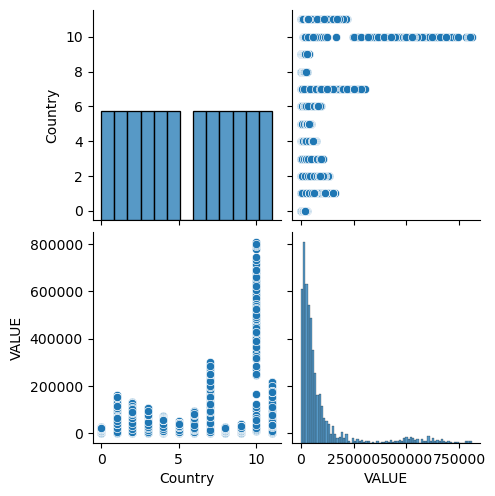

In [232]:
sb.pairplot(tourist_Ireland_df_new[["Country", "VALUE", "Year"]])

## Getting Google trends data scrapped earlier

In [18]:
def country_origin(csv_file, country):
    df = pd.read_csv(csv_file).reset_index()
    df['Country'] = country
    df = df.drop(df.columns[0], axis = 1)
    df = df.drop(df.columns[0], axis=1)
    return df
    
df_trend_Belgium = country_origin('GoogleTrends/Belgium_Irelandby_month.csv','Belgium')
df_trend_Poland = country_origin('GoogleTrends/Poland_Irelandby_month.csv','Poland')
df_trend_Portugal = country_origin('GoogleTrends/Portugal_Irelandby_month.csv','Portugal')
df_trend_France = country_origin('GoogleTrends/France_Irelandby_month.csv','France')
df_trend_Germany = country_origin('GoogleTrends/German_Irelandby_month.csv','Germany')
df_trend_Italy = country_origin('GoogleTrends/Italy_Irelandby_month.csv','Italy')
df_trend_Spain = country_origin('GoogleTrends/Spain_Irelandby_month.csv','Spain')
df_trend_UK = country_origin('GoogleTrends/UK_Irelandby_month.csv','UK')
df_trend_US = country_origin('GoogleTrends/US_Irelandby_month.csv','US')
df_trend_Switzerland = country_origin('GoogleTrends/Switzerland_Irelandby_month.csv','Switzerland')
df_trend_Netherlands = country_origin('GoogleTrends/Netherlands_Irelandby_month.csv','Netherlands')
df_trend_UAE = country_origin('GoogleTrends/UAE_Irelandby_month.csv','UAE')

df_trend = pd.concat([df_trend_Belgium, df_trend_Poland, df_trend_Portugal, df_trend_France, df_trend_Germany, df_trend_Italy, df_trend_Spain, df_trend_UK, df_trend_US, df_trend_Switzerland, df_trend_Netherlands, df_trend_UAE])
df_trend

,Year,Month,Count,Country
0,2010,1,0,Belgium
1,2010,2,0,Belgium
2,2010,3,54,Belgium
3,2010,4,0,Belgium
4,2010,5,37,Belgium
...,...,...,...,...
151,2022,8,0,UAE
152,2022,9,0,UAE
153,2022,10,0,UAE
154,2022,11,0,UAE


## Preprocessing Google Trends data by removing NaN/0 values

In [19]:
df_trend.loc[df_trend[df_trend['Count'] == 0].index, 'Count'] = None
df_trend

,Year,Month,Count,Country
0,2010,1,NaN,Belgium
1,2010,2,NaN,Belgium
2,2010,3,54.0,Belgium
3,2010,4,NaN,Belgium
4,2010,5,NaN,Belgium
...,...,...,...,...
151,2022,8,NaN,UAE
152,2022,9,NaN,UAE
153,2022,10,NaN,UAE
154,2022,11,NaN,UAE


In [20]:
df_trend['Count'].fillna(method='bfill', inplace=True)
df_trend['Count'].fillna(method='ffill', inplace=True)

In [21]:
df_trend

,Year,Month,Count,Country
0,2010,1,54.0,Belgium
1,2010,2,54.0,Belgium
2,2010,3,54.0,Belgium
3,2010,4,14.0,Belgium
4,2010,5,14.0,Belgium
...,...,...,...,...
151,2022,8,21.0,UAE
152,2022,9,21.0,UAE
153,2022,10,21.0,UAE
154,2022,11,21.0,UAE


## Removing insignificant rows from Google Trends data

In [22]:
df_trend.drop((df_trend[(df_trend["Year"] > 2021) & (df_trend["Month"] > 9)]).index, inplace = True)

In [23]:
df_trend

,Year,Month,Count,Country
0,2010,1,54.0,Belgium
1,2010,2,54.0,Belgium
2,2010,3,54.0,Belgium
3,2010,4,14.0,Belgium
4,2010,5,14.0,Belgium
...,...,...,...,...
148,2022,5,21.0,UAE
149,2022,6,21.0,UAE
150,2022,7,21.0,UAE
151,2022,8,21.0,UAE


## Preprocessing Google Trends data by formatting data types of the columns

### Converting month column from month names to month number to merge with trends data

In [24]:
tourist_Ireland_df['Month'] = tourist_Ireland_df['Month'].apply(lambda x: datetime.strptime(x, '%B').month)

In [25]:
tourist_Ireland_df["Year"] = (tourist_Ireland_df["Year"]).astype(int)
tourist_Ireland_df

,Month,Country,VALUE,Year
0,1,UK,361500.0,2010
2,1,Belgium,12500.0,2010
3,1,Germany,45300.0,2010
4,1,Spain,68600.0,2010
5,1,France,48900.0,2010
...,...,...,...,...
2592,9,Poland,39900.0,2022
2593,9,Portugal,82500.0,2022
2595,9,Switzerland,23200.0,2022
2597,9,US,173200.0,2022


## Merging Tourist arrival data with Dublin Temperature data on the basis of Month Column

In [26]:

df_tourist_full = pd.merge(df_trend, df_temperature, how='left', on=['Month'])
df_tourist_full

,Year,Month,Count,Country,average_high_celsius,average_low_celsius,average_precipitation_days,average_precipitation_mm,average_relative_hummidity,daily_mean_celsius
0,2010,1,54.0,Belgium,17.5,5.3,-15.6,2.4,62.6,8.1
1,2010,2,54.0,Belgium,18.1,5.3,-13.4,2.3,48.8,8.3
2,2010,3,54.0,Belgium,23.4,6.8,-9.8,3.4,52.7,10.2
3,2010,4,14.0,Belgium,22.7,8.3,-7.2,4.6,54.1,12.1
4,2010,5,14.0,Belgium,26.8,10.9,-5.6,6.9,59.5,14.8
...,...,...,...,...,...,...,...,...,...,...
1831,2022,5,21.0,UAE,26.8,10.9,-5.6,6.9,59.5,14.8
1832,2022,6,21.0,UAE,28.7,13.6,-0.7,9.6,66.7,17.6
1833,2022,7,21.0,UAE,33.1,15.6,1.8,11.7,56.2,19.5
1834,2022,8,21.0,UAE,30.6,15.3,0.6,11.5,73.3,19.2


## Merging Tourist arrival data and Dublin Temperature data with Google Trends data on the basis of Country, Month and Year

In [27]:
df_tourist_full = pd.merge(df_tourist_full, tourist_Ireland_df, how='inner', on=['Country', 'Month', 'Year'])
df_tourist_full

,Year,Month,Count,Country,average_high_celsius,average_low_celsius,average_precipitation_days,average_precipitation_mm,average_relative_hummidity,daily_mean_celsius,VALUE
0,2010,1,54.0,Belgium,17.5,5.3,-15.6,2.4,62.6,8.1,12500.0
1,2010,2,54.0,Belgium,18.1,5.3,-13.4,2.3,48.8,8.3,14300.0
2,2010,3,54.0,Belgium,23.4,6.8,-9.8,3.4,52.7,10.2,16300.0
3,2010,4,14.0,Belgium,22.7,8.3,-7.2,4.6,54.1,12.1,10200.0
4,2010,5,14.0,Belgium,26.8,10.9,-5.6,6.9,59.5,14.8,12200.0
...,...,...,...,...,...,...,...,...,...,...,...
1831,2022,5,21.0,UAE,26.8,10.9,-5.6,6.9,59.5,14.8,16600.0
1832,2022,6,21.0,UAE,28.7,13.6,-0.7,9.6,66.7,17.6,17500.0
1833,2022,7,21.0,UAE,33.1,15.6,1.8,11.7,56.2,19.5,21700.0
1834,2022,8,21.0,UAE,30.6,15.3,0.6,11.5,73.3,19.2,20800.0


In [28]:
df_tourist_full.dtypes

Year                            int64
Month                           int64
Count                         float64
Country                        object
average_high_celsius          float64
average_low_celsius           float64
average_precipitation_days    float64
average_precipitation_mm      float64
average_relative_hummidity    float64
daily_mean_celsius            float64
VALUE                         float64
dtype: object

In [29]:
tourist_Ireland_df.dtypes

Month        int64
Country     object
VALUE      float64
Year         int32
dtype: object

## Saving the data in CSV format

In [30]:
df_tourist_full.to_csv('Final_Merged_data_corr.csv')

## Removing the label column from dataframe and storing it in CSV format

In [31]:
visitors = df_tourist_full["VALUE"]
visitors

0       12500.0
1       14300.0
2       16300.0
3       10200.0
4       12200.0
         ...   
1831    16600.0
1832    17500.0
1833    21700.0
1834    20800.0
1835    28900.0
Name: VALUE, Length: 1836, dtype: float64

In [32]:

visitors = pd.DataFrame(visitors)
visitors.to_csv('available_output_corr.csv')

## Dropping Label Column from Dataframe To get Features

In [33]:
tourist_data = df_tourist_full
tourist_data.drop('VALUE', inplace=True, axis=1)
tourist_data

,Year,Month,Count,Country,average_high_celsius,average_low_celsius,average_precipitation_days,average_precipitation_mm,average_relative_hummidity,daily_mean_celsius
0,2010,1,54.0,Belgium,17.5,5.3,-15.6,2.4,62.6,8.1
1,2010,2,54.0,Belgium,18.1,5.3,-13.4,2.3,48.8,8.3
2,2010,3,54.0,Belgium,23.4,6.8,-9.8,3.4,52.7,10.2
3,2010,4,14.0,Belgium,22.7,8.3,-7.2,4.6,54.1,12.1
4,2010,5,14.0,Belgium,26.8,10.9,-5.6,6.9,59.5,14.8
...,...,...,...,...,...,...,...,...,...,...
1831,2022,5,21.0,UAE,26.8,10.9,-5.6,6.9,59.5,14.8
1832,2022,6,21.0,UAE,28.7,13.6,-0.7,9.6,66.7,17.6
1833,2022,7,21.0,UAE,33.1,15.6,1.8,11.7,56.2,19.5
1834,2022,8,21.0,UAE,30.6,15.3,0.6,11.5,73.3,19.2


### Dropping year column from data

In [34]:
tourist_data.drop('Year', inplace=True, axis=1)
tourist_data

,Month,Count,Country,average_high_celsius,average_low_celsius,average_precipitation_days,average_precipitation_mm,average_relative_hummidity,daily_mean_celsius
0,1,54.0,Belgium,17.5,5.3,-15.6,2.4,62.6,8.1
1,2,54.0,Belgium,18.1,5.3,-13.4,2.3,48.8,8.3
2,3,54.0,Belgium,23.4,6.8,-9.8,3.4,52.7,10.2
3,4,14.0,Belgium,22.7,8.3,-7.2,4.6,54.1,12.1
4,5,14.0,Belgium,26.8,10.9,-5.6,6.9,59.5,14.8
...,...,...,...,...,...,...,...,...,...
1831,5,21.0,UAE,26.8,10.9,-5.6,6.9,59.5,14.8
1832,6,21.0,UAE,28.7,13.6,-0.7,9.6,66.7,17.6
1833,7,21.0,UAE,33.1,15.6,1.8,11.7,56.2,19.5
1834,8,21.0,UAE,30.6,15.3,0.6,11.5,73.3,19.2


### Converting month back to month name for encoding

In [35]:
tourist_data['Month'] = tourist_data['Month'].apply(lambda x: calendar.month_abbr[x])
tourist_data

,Month,Count,Country,average_high_celsius,average_low_celsius,average_precipitation_days,average_precipitation_mm,average_relative_hummidity,daily_mean_celsius
0,Jan,54.0,Belgium,17.5,5.3,-15.6,2.4,62.6,8.1
1,Feb,54.0,Belgium,18.1,5.3,-13.4,2.3,48.8,8.3
2,Mar,54.0,Belgium,23.4,6.8,-9.8,3.4,52.7,10.2
3,Apr,14.0,Belgium,22.7,8.3,-7.2,4.6,54.1,12.1
4,May,14.0,Belgium,26.8,10.9,-5.6,6.9,59.5,14.8
...,...,...,...,...,...,...,...,...,...
1831,May,21.0,UAE,26.8,10.9,-5.6,6.9,59.5,14.8
1832,Jun,21.0,UAE,28.7,13.6,-0.7,9.6,66.7,17.6
1833,Jul,21.0,UAE,33.1,15.6,1.8,11.7,56.2,19.5
1834,Aug,21.0,UAE,30.6,15.3,0.6,11.5,73.3,19.2


In [36]:
tourist_data.dtypes

Month                          object
Count                         float64
Country                        object
average_high_celsius          float64
average_low_celsius           float64
average_precipitation_days    float64
average_precipitation_mm      float64
average_relative_hummidity    float64
daily_mean_celsius            float64
dtype: object

# Feature Engineering

## Generating data frame for Feature Engineering

In [37]:
feature_df = pd.DataFrame().assign(Count=tourist_data['Count'], average_high_celsius=tourist_data['average_high_celsius'], 
                            average_low_celsius=tourist_data['average_low_celsius'], average_precipitation_days=tourist_data['average_precipitation_days'],
                            average_precipitation_mm=tourist_data['average_precipitation_mm'], average_relative_hummidity=tourist_data['average_relative_hummidity'],
                            daily_mean_celsius=tourist_data['daily_mean_celsius'])
feature_df

,Count,average_high_celsius,average_low_celsius,average_precipitation_days,average_precipitation_mm,average_relative_hummidity,daily_mean_celsius
0,54.0,17.5,5.3,-15.6,2.4,62.6,8.1
1,54.0,18.1,5.3,-13.4,2.3,48.8,8.3
2,54.0,23.4,6.8,-9.8,3.4,52.7,10.2
3,14.0,22.7,8.3,-7.2,4.6,54.1,12.1
4,14.0,26.8,10.9,-5.6,6.9,59.5,14.8
...,...,...,...,...,...,...,...
1831,21.0,26.8,10.9,-5.6,6.9,59.5,14.8
1832,21.0,28.7,13.6,-0.7,9.6,66.7,17.6
1833,21.0,33.1,15.6,1.8,11.7,56.2,19.5
1834,21.0,30.6,15.3,0.6,11.5,73.3,19.2


## Feature Selection using Heat Map to get correlated features

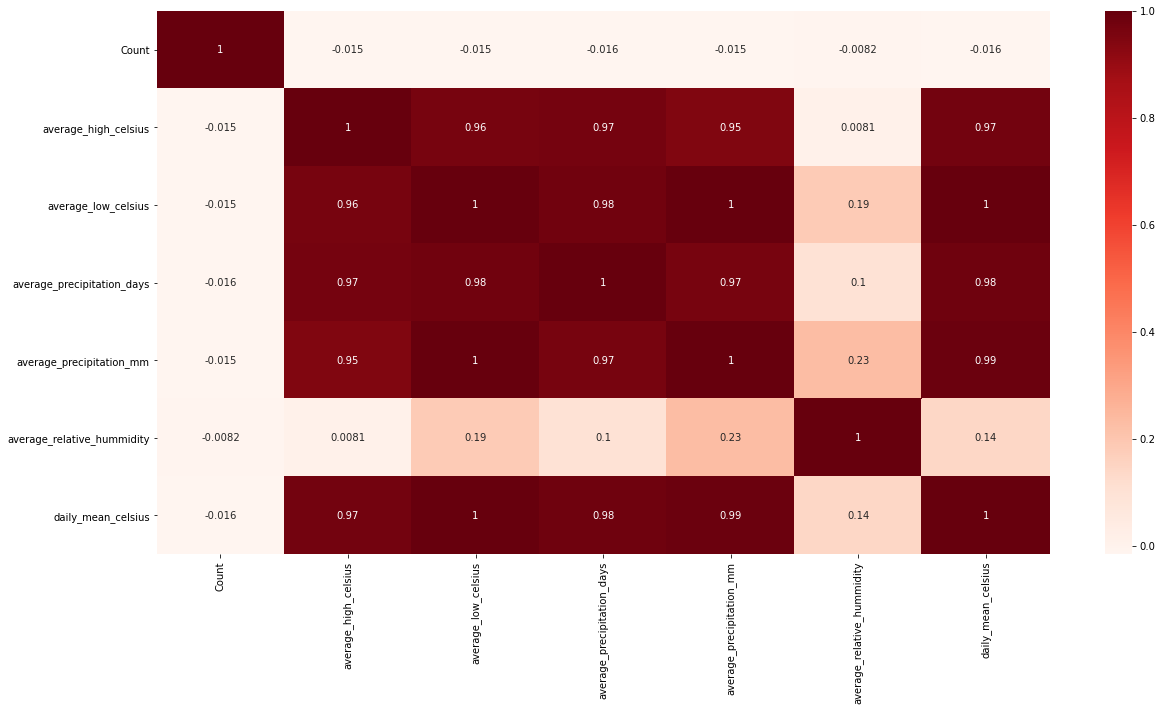

In [38]:
plt.figure(figsize = (20,10))
correlation_matrix = feature_df.corr()
sb.heatmap(correlation_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

## Feature Selection using Lasso Regression to Remove Less Significant Features

### Normalisation of data

In [39]:
scaler_feature = StandardScaler()
scaler_label = StandardScaler()
features_array = scaler_feature.fit_transform(feature_df)
label_array = scaler_label.fit_transform(visitors)


### Function to perform 5-fold Cross validation for Lasso Regression for selecting penalty parameter 

In [40]:
def calculate_mse_stddev_penalty_lasso(penalty_parameters) : 

    k_fold_split = 5

    k_fold_split_function =  KFold(n_splits = k_fold_split)

    mean_sqaure_error_penalty = []
    standard_deviation_penalty = []

    for penalty in penalty_parameters : 
        lasso_model = Lasso(alpha = 1 / (2 * penalty))
        
        mean_sqaure_error_fold = []
        for train_index, test_index in k_fold_split_function.split(features_array):
            X_train, X_test = features_array[train_index], features_array[test_index]
            y_train, y_test = label_array[train_index], label_array[test_index]
            lasso_model.fit(X_train, y_train)
            predictions = lasso_model.predict(X_test)
            
            mean_sqaure_error_fold.append(mean_squared_error(y_test, predictions))

        mean_sqaure_error_penalty.append(np.array(mean_sqaure_error_fold).mean())
        standard_deviation_penalty.append(np.array(mean_sqaure_error_fold).std())
        
    return mean_sqaure_error_penalty, standard_deviation_penalty


### Testing Lasso model for different penalty parameters

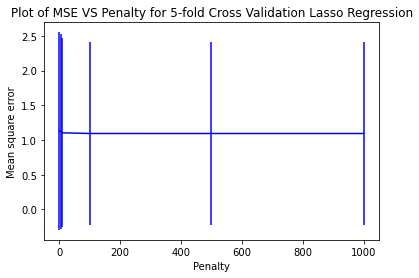

In [41]:
penalty_parameters = [1, 5, 10, 100, 500, 1000]

mean_sqaure_error, standard_deviation = calculate_mse_stddev_penalty_lasso(penalty_parameters)

plt.figure()
plt.errorbar(penalty_parameters, mean_sqaure_error, yerr = standard_deviation, color = 'blue')
plt.xlabel('Penalty')
plt.ylabel('Mean square error')
plt.title('Plot of MSE VS Penalty for 5-fold Cross Validation Lasso Regression')
plt.show()

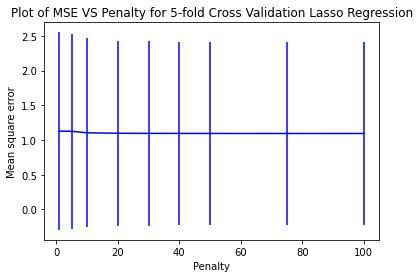

In [42]:
penalty_parameters =  [1, 5, 10, 20, 30, 40, 50, 75, 100]

mean_sqaure_error, standard_deviation = calculate_mse_stddev_penalty_lasso(penalty_parameters)

plt.figure()
plt.errorbar(penalty_parameters, mean_sqaure_error, yerr = standard_deviation, color = 'blue')
plt.xlabel('Penalty')
plt.ylabel('Mean square error')
plt.title('Plot of MSE VS Penalty for 5-fold Cross Validation Lasso Regression')
plt.show()

### Getting the name of insignificant features using the ideal penalty parameter range confirmed from above experiment

In [43]:
feature_names = list(feature_df.columns.values)
feature_names.insert(0, 'Penalty')
feature_names.insert(1, 'Intercept')

In [44]:
penalty_parameters = [10]

In [46]:

lasso_model_dictionary = {}
X_Train,X_Test,y_Train,y_Test = train_test_split(features_array,label_array,test_size = 0.2, random_state=111, shuffle = False)
lasso_model_params_df = pd.DataFrame(columns = feature_names)
lasso_model_equation_df = pd.DataFrame(columns = ['Penalty', 'Model Equation'])
for penalty in penalty_parameters:
    lasso_model = Lasso(alpha = 1 / (2 * penalty))
    lasso_model.fit(X_Train, y_Train)
    
    model_dict = {}
    model_dict['Penalty'] = penalty
    model_dict['Intercept'] = [np.around(lasso_model.intercept_, decimals = 3)]
    for i in range(2, (len(feature_df.columns) + 2)) :
        model_dict[feature_names[i]] = [np.around(lasso_model.coef_[i-2], decimals = 3)]
    
    lasso_model_params_df = lasso_model_params_df.append(model_dict, ignore_index = True)
    
    model_eq_dict = {}
    model_eq_dict['Penalty'] = penalty
    equation_string = ''
    for i in range(2, (len(feature_df.columns) + 2)) :
        coeff = np.around(lasso_model.coef_[i-2], decimals = 3)
        if coeff != 0 : 
            equation_string += '(' + str(coeff) + ')' + ' * ' + feature_names[i] + ' + '
    
    equation_string += '(' + str(np.around(lasso_model.intercept_, decimals = 3)) + ')'
    model_eq_dict['Model Equation'] = equation_string
    
    lasso_model_equation_df = lasso_model_equation_df.append(model_eq_dict, ignore_index = True)
    
    lasso_model_dictionary[penalty] = lasso_model

lasso_model_params_df = lasso_model_params_df.style.applymap(lambda x:'white-space:nowrap')
display(lasso_model_params_df)


,Penalty,Intercept,Count,average_high_celsius,average_low_celsius,average_precipitation_days,average_precipitation_mm,average_relative_hummidity,daily_mean_celsius
0,10,[array([0.079])],[0.222],[0.012],[0.079],[0.0],[0.0],[0.0],[0.019]


### Dropping features based on Heat Map and Lasso Regression

In [47]:
tourist_data.drop('average_precipitation_days', inplace=True, axis=1)
tourist_data.drop('average_precipitation_mm', inplace=True, axis=1)
tourist_data.drop('average_relative_hummidity', inplace=True, axis=1)
print(tourist_data.columns)
tourist_data

Index(['Month', 'Count', 'Country', 'average_high_celsius',
       'average_low_celsius', 'daily_mean_celsius'],
      dtype='object')


,Month,Count,Country,average_high_celsius,average_low_celsius,daily_mean_celsius
0,Jan,54.0,Belgium,17.5,5.3,8.1
1,Feb,54.0,Belgium,18.1,5.3,8.3
2,Mar,54.0,Belgium,23.4,6.8,10.2
3,Apr,14.0,Belgium,22.7,8.3,12.1
4,May,14.0,Belgium,26.8,10.9,14.8
...,...,...,...,...,...,...
1831,May,21.0,UAE,26.8,10.9,14.8
1832,Jun,21.0,UAE,28.7,13.6,17.6
1833,Jul,21.0,UAE,33.1,15.6,19.5
1834,Aug,21.0,UAE,30.6,15.3,19.2


# Feature Engineering data by one-hot encoding categorical data

### One-hot encoding

In [48]:
tourist_data = pd.get_dummies(tourist_data)
tourist_data

,Count,average_high_celsius,average_low_celsius,daily_mean_celsius,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,...,Country_Germany,Country_Italy,Country_Netherlands,Country_Poland,Country_Portugal,Country_Spain,Country_Switzerland,Country_UAE,Country_UK,Country_US
0,54.0,17.5,5.3,8.1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,54.0,18.1,5.3,8.3,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,54.0,23.4,6.8,10.2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14.0,22.7,8.3,12.1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14.0,26.8,10.9,14.8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,21.0,26.8,10.9,14.8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1832,21.0,28.7,13.6,17.6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1833,21.0,33.1,15.6,19.5,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1834,21.0,30.6,15.3,19.2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [49]:
tourist_data.isna().sum()

Count                   0
average_high_celsius    0
average_low_celsius     0
daily_mean_celsius      0
Month_Apr               0
Month_Aug               0
Month_Dec               0
Month_Feb               0
Month_Jan               0
Month_Jul               0
Month_Jun               0
Month_Mar               0
Month_May               0
Month_Nov               0
Month_Oct               0
Month_Sep               0
Country_Belgium         0
Country_France          0
Country_Germany         0
Country_Italy           0
Country_Netherlands     0
Country_Poland          0
Country_Portugal        0
Country_Spain           0
Country_Switzerland     0
Country_UAE             0
Country_UK              0
Country_US              0
dtype: int64

In [50]:
tourist_data

,Count,average_high_celsius,average_low_celsius,daily_mean_celsius,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,...,Country_Germany,Country_Italy,Country_Netherlands,Country_Poland,Country_Portugal,Country_Spain,Country_Switzerland,Country_UAE,Country_UK,Country_US
0,54.0,17.5,5.3,8.1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,54.0,18.1,5.3,8.3,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,54.0,23.4,6.8,10.2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14.0,22.7,8.3,12.1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14.0,26.8,10.9,14.8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,21.0,26.8,10.9,14.8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1832,21.0,28.7,13.6,17.6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1833,21.0,33.1,15.6,19.5,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1834,21.0,30.6,15.3,19.2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [51]:
tourist_data.to_csv('available_input_corr.csv')